In [ ]:
import pandas as pd
import seaborn as sns
d_loff=pd.read_csv('/content/layoffs.csv')
d_loff.columns




Index(['Id', 'Nombre', 'Apellido', 'Area', 'Fecha comienzo', 'Fecha fin',
       'Nivel', 'Grupo recruitment', 'Tiempo recruitment', 'Rango Salarial',
       'RS competencia', 'Manager', 'Realizo Cursos'],
      dtype='object')

In [ ]:
import numpy as np

In [ ]:
%%capture
!pip install funpymodeling
from funpymodeling.exploratory import status


In [ ]:
status(d_loff)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Id,0,0.0,0,0.0,30,int64
1,Nombre,0,0.0,0,0.0,29,object
2,Apellido,0,0.0,0,0.0,30,object
3,Area,0,0.0,0,0.0,7,object
4,Fecha comienzo,0,0.0,0,0.0,26,object
5,Fecha fin,0,0.0,0,0.0,21,object
6,Nivel,0,0.0,0,0.0,7,object
7,Grupo recruitment,0,0.0,0,0.0,3,object
8,Tiempo recruitment,0,0.0,0,0.0,4,int64
9,Rango Salarial,0,0.0,0,0.0,6,object


# 1 - Porcentaje que realizó cursos

In [ ]:
d_loff['Realizo Cursos'].value_counts(normalize=True)

SI    0.666667
NO    0.333333
Name: Realizo Cursos, dtype: float64

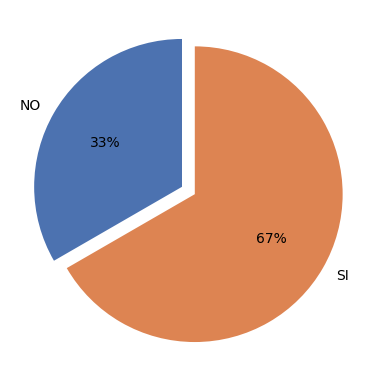

In [ ]:
import matplotlib.pyplot as plt
data = [0.333333,  0.666667]
labels = ['NO', 'SI']
explode = [0.1, 0]
colors = sns.color_palette('deep')
plt.pie(data, labels = labels, colors = colors, explode = explode, startangle=90, autopct='%.0f%%')
plt.show()


# 2 - Cantidad de desvinculaciones por área

<Axes: xlabel='Area', ylabel='count'>

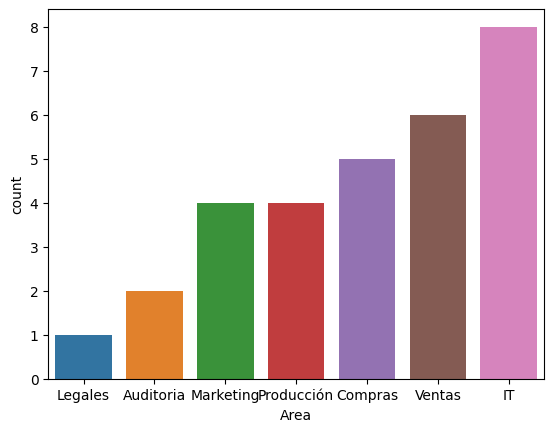

In [ ]:
sns.countplot(x='Area', data=d_loff, order = d_loff['Area'].value_counts(ascending=True).index)


# 3 - Cantidad de desvinculaciones por manager

<Axes: xlabel='Manager', ylabel='count'>

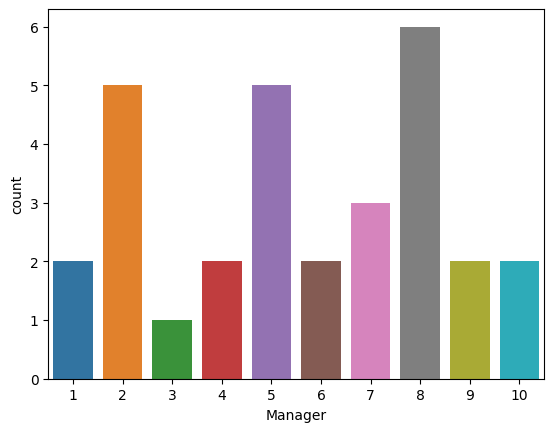

In [ ]:
sns.countplot(x='Manager', data=d_loff)

# 4 - Cantidad de desvinculaciones por Rango Salarial

<Axes: xlabel='Rango Salarial', ylabel='count'>

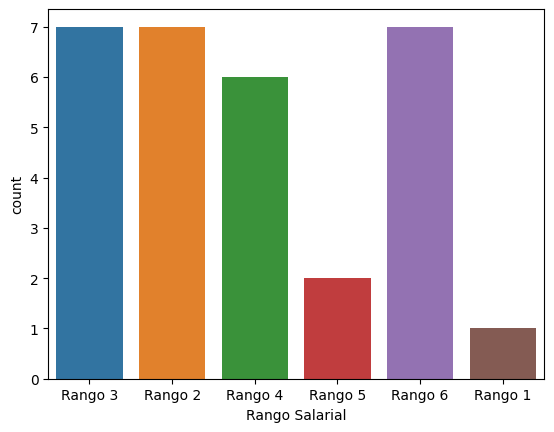

In [ ]:
sns.countplot(x='Rango Salarial', data=d_loff)

# 5 - Cantidad de tiempo trabajado

<ipython-input-28-9a5435c415cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_lofft['Fecha comienzo'] =  pd.to_datetime(d_lofft['Fecha comienzo'].str.replace('/','-'))
<ipython-input-28-9a5435c415cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_lofft['Fecha fin'] =  pd.to_datetime(d_lofft['Fecha fin'].str.replace('/','-'))
<ipython-input-28-9a5435c415cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

<Axes: xlabel='Años trabajados', ylabel='Count'>

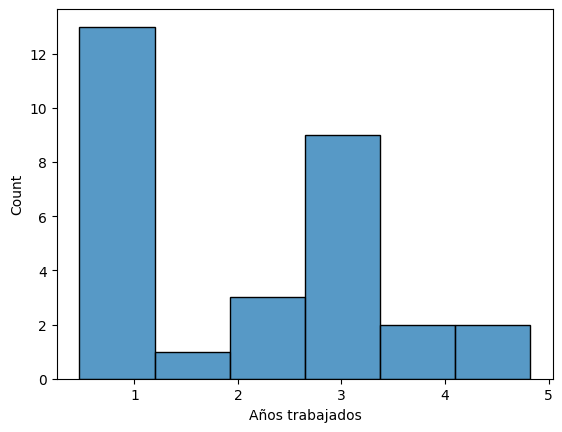

In [ ]:
d_lofft = d_loff[['Fecha comienzo','Fecha fin']]
d_lofft['Fecha comienzo'] =  pd.to_datetime(d_lofft['Fecha comienzo'].str.replace('/','-'))
d_lofft['Fecha fin'] =  pd.to_datetime(d_lofft['Fecha fin'].str.replace('/','-'))
d_lofft['diff_days'] = d_lofft['Fecha fin'] - d_lofft['Fecha comienzo']
d_lofft['diff_days'] = (d_lofft['diff_days']).dt.days
d_lofft['Años trabajados'] = (d_lofft['diff_days'])/365
sns.histplot(d_lofft['Años trabajados'])

# Anexo1

###Layoff por Área y manager / Layoff por cantidad de Años trabajados (con cariño y esfuerzo)

In [ ]:
d_loffa = d_loff[['Area', 'Manager', 'Rango Salarial']].join(d_lofft['Años trabajados']).sort_values(['Area', 'Manager', 'Rango Salarial', 'Años trabajados'], ascending=[True,False,False,True])
d_loffa2 = d_loffa[['Años trabajados', 'Area', 'Manager', 'Rango Salarial']].join(d_loff['Realizo Cursos']).sort_values(['Años trabajados', 'Area', 'Manager', 'Rango Salarial'], ascending=[False,True,False,False])
from IPython.display import HTML

def aurinegro(*dfs):
    html = '<div style="display:flex">'
    for df in dfs:
        html += '<div style="margin-right: 15em" "margin-color": black and yellow>'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    display(HTML(html))

aurinegro(d_loffa[['Area', 'Manager', 'Rango Salarial']], d_loffa2)

,Area,Manager,Rango Salarial
18,Auditoria,10,Rango 4
29,Auditoria,10,Rango 1
20,Compras,2,Rango 6
14,Compras,2,Rango 4
7,Compras,2,Rango 3
26,Compras,2,Rango 2
1,Compras,2,Rango 2
12,IT,7,Rango 4
9,IT,7,Rango 3
16,IT,7,Rango 2


#¿Quién ganaba más dinero?

In [ ]:
d_loff[d_loff["Rango Salarial"] == "Rango 1"]

,Id,Nombre,Apellido,Area,Fecha comienzo,Fecha fin,Nivel,Grupo recruitment,Tiempo recruitment,Rango Salarial,RS competencia,Manager,Realizo Cursos
29,30,Diego,Buzos,Auditoria,09/06/2021,06/30/2022,N1,Grupo C,3,Rango 1,Rango 1,10,SI


In [ ]:
d_loff2=d_loff
d_loff2['Fecha comienzo']=d_lofft['Fecha comienzo'].values
d_loff2['Fecha fin']=d_lofft['Fecha fin'].values
d_loff2['Fecha comienzo']=d_loff2['Fecha comienzo'].dt.date
d_loff2['Fecha fin']=d_loff2['Fecha fin'].dt.date

# A jugar con la tabla para ordenar los datos por categorias

In [ ]:
from google.colab.data_table import DataTable
DataTable(d_loff2)

,Id,Nombre,Apellido,Area,Fecha comienzo,Fecha fin,Nivel,Grupo recruitment,Tiempo recruitment,Rango Salarial,RS competencia,Manager,Realizo Cursos
0,1,Romina,Brito,Marketing,2018-03-05,2018-12-31,N3,Grupo B,3,Rango 3,Rango 3,1,SI
1,2,Pedro,Lujan,Compras,2017-03-06,2021-12-31,N3,Grupo B,3,Rango 2,Rango 2,2,SI
2,3,Juan,Albornoz,IT,2018-06-04,2019-04-30,N4,Grupo C,4,Rango 4,Rango 4,5,NO
3,4,Sebastian,González,Legales,2018-05-07,2021-05-30,N2,Grupo A,4,Rango 2,Rango 2,3,SI
4,5,Franco,Rodríguez,Marketing,2017-05-01,2017-11-30,N5,Grupo C,6,Rango 5,Rango 4,1,SI
5,6,Catalina,Gómez,Producción,2019-04-01,2022-03-31,N2,Grupo B,4,Rango 2,Rango 2,4,NO
6,7,Anabella,Fernández,Ventas,2020-07-06,2021-03-31,N4,Grupo A,3,Rango 4,Rango 4,8,NO
7,8,Francesca,López,Compras,2017-01-02,2021-06-30,N3,Grupo A,4,Rango 3,Rango 3,2,SI
8,9,Nicolas,Martínez,IT,2021-01-04,2021-11-30,N2,Grupo C,6,Rango 3,Rango 3,5,SI
9,10,Ana,Diaz,IT,2017-03-06,2020-11-30,N4,Grupo A,3,Rango 3,Rango 3,7,NO


In [ ]:
%%capture
d_loff=pd.read_csv('/content/layoffs.csv')
d_loff4 = d_loff[['Id', 'Nombre', 'Apellido', 'Area','Fecha comienzo','Fecha fin']]
d_loff4['Fecha comienzo'] =  pd.to_datetime(d_loff4['Fecha comienzo'].str.replace('/','-'))
d_loff4['Fecha fin'] =  pd.to_datetime(d_loff4['Fecha fin'].str.replace('/','-'))


In [ ]:
print(d_loff4.sort_values('Fecha comienzo').head(1))
d_loff4.sort_values('Fecha fin').tail(1)

   Id     Nombre Apellido     Area Fecha comienzo  Fecha fin
7   8  Francesca    López  Compras     2017-01-02 2021-06-30


,Id,Nombre,Apellido,Area,Fecha comienzo,Fecha fin
22,23,Camila,Prieto,IT,2022-01-03,2022-07-01


In [ ]:
import datetime
pd.period_range(start="2017-01",end="2022-07", freq='M')

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
             '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
             '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
             '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
             '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
             '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
             '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
             '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
             '2022-07'],
            dtype='period[M]')

In [ ]:
import datetime
pd.period_range(start="2017-01",end="2022-07", freq='M')

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
             '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
             '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
             '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
             '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
             '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
             '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
             '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
             '2022-07'],
            dtype='period[M]')

In [ ]:
print(d_loff4.loc[0,'Fecha comienzo'],d_loff4.loc[0,'Fecha fin']);
print(d_loff4.loc[1,'Fecha comienzo'],d_loff4.loc[1,'Fecha fin']);
print(d_loff4.loc[2,'Fecha comienzo'],d_loff4.loc[2,'Fecha fin']);
print(d_loff4.loc[3,'Fecha comienzo'],d_loff4.loc[3,'Fecha fin']);
print(d_loff4.loc[4,'Fecha comienzo'],d_loff4.loc[4,'Fecha fin']);
print(d_loff4.loc[5,'Fecha comienzo'],d_loff4.loc[5,'Fecha fin']);
print(d_loff4.loc[6,'Fecha comienzo'],d_loff4.loc[6,'Fecha fin']);
print(d_loff4.loc[7,'Fecha comienzo'],d_loff4.loc[7,'Fecha fin']);
print(d_loff4.loc[8,'Fecha comienzo'],d_loff4.loc[8,'Fecha fin']);

2018-03-05 00:00:00 2018-12-31 00:00:00
2017-03-06 00:00:00 2021-12-31 00:00:00
2018-06-04 00:00:00 2019-04-30 00:00:00
2018-05-07 00:00:00 2021-05-30 00:00:00
2017-05-01 00:00:00 2017-11-30 00:00:00
2019-04-01 00:00:00 2022-03-31 00:00:00
2020-07-06 00:00:00 2021-03-31 00:00:00
2017-01-02 00:00:00 2021-06-30 00:00:00
2021-01-04 00:00:00 2021-11-30 00:00:00


In [ ]:
print(pd.period_range(start="2018-03",end="2018-12", freq='M'))
print(pd.period_range(start="2017-03",end="2021-12", freq='M'))
print(pd.period_range(start="2018-06",end="2019-04", freq='M'))
print(pd.period_range(start="2018-05",end="2021-05", freq='M'))
print(pd.period_range(start="2017-05",end="2017-11", freq='M'))
print(pd.period_range(start="2019-04",end="2022-03", freq='M'))
print(pd.period_range(start="2020-07",end="2021-03", freq='M'))
print(pd.period_range(start="2017-01",end="2021-06", freq='M'))
print(pd.period_range(start="2021-01",end="2021-11", freq='M'))

PeriodIndex(['2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]')
PeriodIndex(['2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08',
             '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02',
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02',
             '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
             '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02',
             '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
             '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02',
             '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
             '2021-09', '2021-10', '2021-11', '2021-12'],
            dtype='period[M]')
PeriodIndex(['2018-06', '2018-07

In [ ]:
d_loff4.loc[d_loff4['Id']==1, ['2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12']]=1
d_loff4.loc[d_loff4['Id']==2, ['2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08',
             '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02',
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02',
             '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
             '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02',
             '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
             '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02',
             '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
             '2021-09', '2021-10', '2021-11', '2021-12']]=1
d_loff4.loc[d_loff4['Id']==3, ['2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11',
             '2018-12', '2019-01', '2019-02', '2019-03', '2019-04']]=1
d_loff4.loc[d_loff4['Id']==4, ['2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10',
             '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04',
             '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10',
             '2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04',
             '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10',
             '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04',
             '2021-05']]=1
d_loff4.loc[d_loff4['Id']==5, ['2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10',
             '2017-11']]=1
d_loff4.loc[d_loff4['Id']==6, ['2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
             '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
             '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09',
             '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03',
             '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
             '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03']]=1
d_loff4.loc[d_loff4['Id']==7, ['2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
             '2021-01', '2021-02', '2021-03']]=1
d_loff4.loc[d_loff4['Id']==8, ['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
             '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
             '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
             '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
             '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
             '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06']]=1
d_loff4.loc[d_loff4['Id']==9, ['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
             '2021-07', '2021-08', '2021-09', '2021-10', '2021-11']]=1
d_loff4

,Id,Nombre,Apellido,Area,Fecha comienzo,Fecha fin,2018-03,2018-04,2018-05,2018-06,...,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2017-01,2017-02
0,1,Romina,Brito,Marketing,2018-03-05,2018-12-31,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Pedro,Lujan,Compras,2017-03-06,2021-12-31,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2,3,Juan,Albornoz,IT,2018-06-04,2019-04-30,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Sebastian,González,Legales,2018-05-07,2021-05-30,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Franco,Rodríguez,Marketing,2017-05-01,2017-11-30,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Catalina,Gómez,Producción,2019-04-01,2022-03-31,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
6,7,Anabella,Fernández,Ventas,2020-07-06,2021-03-31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Francesca,López,Compras,2017-01-02,2021-06-30,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
8,9,Nicolas,Martínez,IT,2021-01-04,2021-11-30,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Ana,Diaz,IT,2017-03-06,2020-11-30,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
d_loff4.loc['Total de empleados por mes']= d_loff4.sum(numeric_only=True, axis=0)
d_loff5=d_loff4.fillna(0)
d_loff5

<ipython-input-22-5dd8b17deba3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_loff4.loc['Total de empleados por mes']= d_loff4.sum(numeric_only=True, axis=0)


,Id,Nombre,Apellido,Area,Fecha comienzo,Fecha fin,2018-03,2018-04,2018-05,2018-06,...,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2017-01,2017-02
0,1.0,Romina,Brito,Marketing,2018-03-05 00:00:00,2018-12-31 00:00:00,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,Pedro,Lujan,Compras,2017-03-06 00:00:00,2021-12-31 00:00:00,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.0,Juan,Albornoz,IT,2018-06-04 00:00:00,2019-04-30 00:00:00,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,Sebastian,González,Legales,2018-05-07 00:00:00,2021-05-30 00:00:00,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Franco,Rodríguez,Marketing,2017-05-01 00:00:00,2017-11-30 00:00:00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6.0,Catalina,Gómez,Producción,2019-04-01 00:00:00,2022-03-31 00:00:00,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
6,7.0,Anabella,Fernández,Ventas,2020-07-06 00:00:00,2021-03-31 00:00:00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8.0,Francesca,López,Compras,2017-01-02 00:00:00,2021-06-30 00:00:00,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
8,9.0,Nicolas,Martínez,IT,2021-01-04 00:00:00,2021-11-30 00:00:00,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10.0,Ana,Diaz,IT,2017-03-06 00:00:00,2020-11-30 00:00:00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Bueno, el trabajo quedo inconcluso, la idea era hacer una Times Series sobre las entradas y salidas de los empleados